In [1]:
from os import error
from bs4 import BeautifulSoup
from numpy import string_
import requests
import statsmodels.api as sm
import datetime
import pandas as p
from sklearn import metrics
from patsy import dmatrices
import numpy as np
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt
from matplotlib.pyplot import *
import seaborn as sns
from scipy.stats import chi2_contingency
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [2]:
athletes=pd.read_csv('C:/Users/A/Downloads/Data Sience Project/res.csv')

C:\Users\A\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (12) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
medal_num={'Gold':1,'Silver':1,'Bronze':1}
sex_num={'Female':1,'Male':0}
athletes.medal.replace(medal_num,inplace=True)
athletes.sex.replace(sex_num,inplace=True)
athletes = athletes.iloc[: , 1:]
athletes.head()#Show Table
#Convert the medal and the sex column to numbers

,cm,city,medal,noc,age,year of birth,season,compettor,compettion_year,event,pos,kg,sex
0,171.0,Roma,1.0,Soviet Union Ukraine,28.0,1932.0,summer,Boris Shakhlin,1960,"Individual All-Around, Men",1,71,0
1,160.0,Roma,1.0,Japan,29.0,1931.0,summer,Takashi Ono,1960,"Individual All-Around, Men",2,58,0
2,170.0,Roma,1.0,Russian Federation Soviet Union,25.0,1935.0,summer,Yury Titov,1960,"Individual All-Around, Men",3,70,0
3,158.0,Roma,NaN,Japan,22.0,1938.0,summer,Shuji Tsurumi,1960,"Individual All-Around, Men",4,52,0
4,161.0,Roma,NaN,Japan,23.0,1937.0,summer,Yukio Endo,1960,"Individual All-Around, Men",=5,58,0


In [4]:
athletes['pos'] = athletes['pos'].fillna(0)
athletes['medal'] = athletes['medal'].fillna(0)
athletes.head()
# Replacing all the NaN values to 0 in the pos column.

,cm,city,medal,noc,age,year of birth,season,compettor,compettion_year,event,pos,kg,sex
0,171.0,Roma,1.0,Soviet Union Ukraine,28.0,1932.0,summer,Boris Shakhlin,1960,"Individual All-Around, Men",1,71,0
1,160.0,Roma,1.0,Japan,29.0,1931.0,summer,Takashi Ono,1960,"Individual All-Around, Men",2,58,0
2,170.0,Roma,1.0,Russian Federation Soviet Union,25.0,1935.0,summer,Yury Titov,1960,"Individual All-Around, Men",3,70,0
3,158.0,Roma,0.0,Japan,22.0,1938.0,summer,Shuji Tsurumi,1960,"Individual All-Around, Men",4,52,0
4,161.0,Roma,0.0,Japan,23.0,1937.0,summer,Yukio Endo,1960,"Individual All-Around, Men",=5,58,0


In [5]:
athletes.drop_duplicates()
# delete the double rows

,cm,city,medal,noc,age,year of birth,season,compettor,compettion_year,event,pos,kg,sex
0,171.0,Roma,1.0,Soviet Union Ukraine,28.0,1932.0,summer,Boris Shakhlin,1960,"Individual All-Around, Men",1,71,0
1,160.0,Roma,1.0,Japan,29.0,1931.0,summer,Takashi Ono,1960,"Individual All-Around, Men",2,58,0
2,170.0,Roma,1.0,Russian Federation Soviet Union,25.0,1935.0,summer,Yury Titov,1960,"Individual All-Around, Men",3,70,0
3,158.0,Roma,0.0,Japan,22.0,1938.0,summer,Shuji Tsurumi,1960,"Individual All-Around, Men",4,52,0
4,161.0,Roma,0.0,Japan,23.0,1937.0,summer,Yukio Endo,1960,"Individual All-Around, Men",=5,58,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
79713,NaN,Tokyo,0.0,Ukraine,26.0,1994.0,summer,Mykola Prostorov,2020,"Individual, Men",12 r1/2,NaN,0
79714,NaN,Tokyo,0.0,United States,25.0,1995.0,summer,Aliaksei Shostak,2020,"Individual, Men",13 r1/2,NaN,0
79715,170.0,Tokyo,0.0,People's Republic of China,28.0,1992.0,summer,Gao Lei,2020,"Individual, Men",14 r1/2,64.0,0
79716,NaN,Tokyo,0.0,Japan,23.0,1997.0,summer,Ryosuke Sakai,2020,"Individual, Men",15 r1/2,NaN,0


In [6]:
#athletes = athletes.drop(athletes.index[athletes.age == "None"])
athletes=athletes.dropna()
athletes["age"] = athletes["age"].astype("int") 
athletes["medal"] = athletes["medal"].astype("int") 
athletes["year of birth"] = athletes["year of birth"].astype("int") 
athletes.head()
#athletes["medal"] = athletes["medal"].astype("int") 
#athletes["year of birth"] = athletes["year of birth"].astype("int") 
#athletes.dtypes
#Convert object to int (age, year of birth)

,cm,city,medal,noc,age,year of birth,season,compettor,compettion_year,event,pos,kg,sex
0,171.0,Roma,1,Soviet Union Ukraine,28,1932,summer,Boris Shakhlin,1960,"Individual All-Around, Men",1,71,0
1,160.0,Roma,1,Japan,29,1931,summer,Takashi Ono,1960,"Individual All-Around, Men",2,58,0
2,170.0,Roma,1,Russian Federation Soviet Union,25,1935,summer,Yury Titov,1960,"Individual All-Around, Men",3,70,0
3,158.0,Roma,0,Japan,22,1938,summer,Shuji Tsurumi,1960,"Individual All-Around, Men",4,52,0
4,161.0,Roma,0,Japan,23,1937,summer,Yukio Endo,1960,"Individual All-Around, Men",=5,58,0


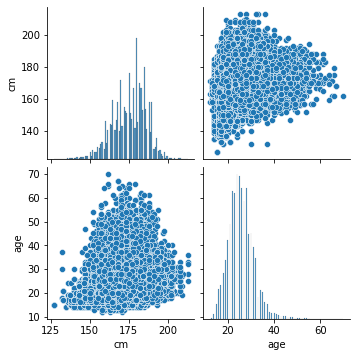

In [7]:
sns.pairplot(athletes[['cm','kg','age']])

In [8]:
# Giving each column a variable
#H = olympics_df['Height (m)']
#W = olympics_df['Weight']
#A = olympics_df['Age']
#B = olympics_df['BMI']
#M = olympics_df['Medal']


#plt.scatter(B,athletes['medal'],c="purple")
#plt.xlabel("BMI")
#plt.ylabel("Medal")
#plt.title("Medal by BMI")
#plt.savefig("static/img/Medal_BMI.png", bbox_inches='tight', pad_inches=0.5)

In [9]:
# Using features with the highest importance
X = pd.get_dummies(athletes[["sex", "age", "cm", "kg","noc"]])
y = athletes["medal"]
print(X.shape, y.shape)

(72701, 697) (72701,)


In [10]:
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42,test_size=0.3)

In [15]:
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

C:\Users\A\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\A\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [16]:
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.907326914259514
Testing Data Score: 0.9126870598591549


In [17]:
X = pd.get_dummies(athletes[["sex", "age", "cm", "kg","noc"]])
y = athletes["medal"].values.reshape(-1,1)
print(X.shape, y.shape)
feature_names = X

(72701, 697) (72701, 1)


In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
